In [199]:
import numpy as np
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
img = cv2.imread("../images/phantom.png",0)
# img = np.ones((480,480), dtype='uint8')*255
img.shape

(480, 480)

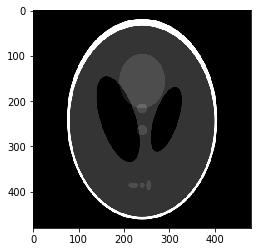

In [10]:
plt.imshow(img, cmap='gray')

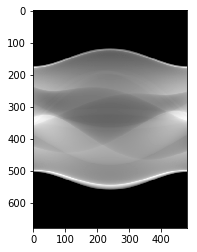

In [104]:
theta0 = np.linspace(0., 180., max(img.shape), endpoint=False)
sinogram0 = radon(img, theta=theta0, circle=False)
plt.imshow(sinogram0, cmap='gray')

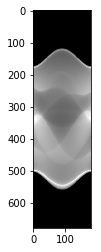

In [105]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
sinogram1 = radon(img, theta=theta1, circle=False)
plt.imshow(sinogram1, cmap='gray')

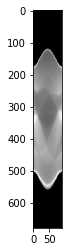

In [107]:
theta2 = np.linspace(0., 180., 90, endpoint=False)
sinogram2 = radon(img, theta=theta2, circle=False)
plt.imshow(sinogram2, cmap='gray')

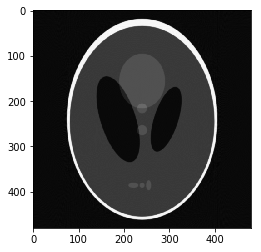

In [110]:
fbp0 = iradon(sinogram0, theta=theta0, circle=False)
plt.imshow(fbp0, cmap = 'gray')

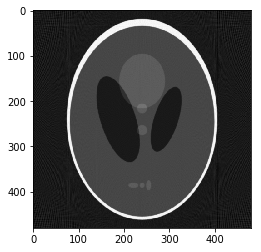

In [111]:
fbp1 = iradon(sinogram1, theta=theta1, circle=False)
plt.imshow(fbp1, cmap = 'gray')

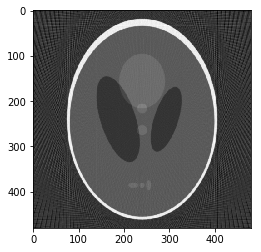

In [113]:
fbp2 = iradon(sinogram2, theta=theta2, circle=False)
plt.imshow(fbp2, cmap = 'gray')

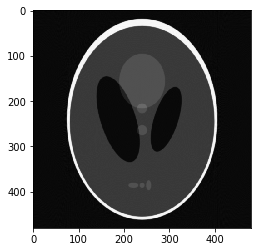

In [114]:
x0 = np.zeros((480,480), dtype='float64')
ATA0 =  iradon(radon(np.ones((480,480)),theta=theta0,circle=False),theta=theta0,circle=False)
x0+=iradon((sinogram0 - radon(x0,theta=theta0,circle=False)),theta=theta0,circle=False)/ATA0
plt.imshow(x0,cmap='gray')

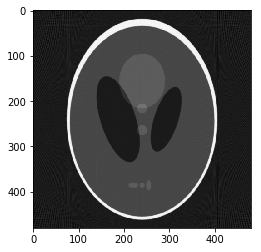

In [115]:
x1 = np.zeros((480,480), dtype='float64')
ATA1 =  iradon(radon(np.ones((480,480)),theta=theta1,circle=False),theta=theta1,circle=False)
x1+=iradon((sinogram1 - radon(x1,theta=theta1,circle=False)),theta=theta1,circle=False)/ATA1
plt.imshow(x1,cmap='gray')

0
50.1958310074
1
40.3413783238
2
32.6128362343
3
26.5800044594
4
21.9103688127
5
18.3407474335
6
15.6577485949
7
13.6832364729
8
12.2647005304
9
11.270700397
10
10.5902821805
11
10.1336988863
12
9.8320342316
13
9.63493282664
14
9.50708976399
15
9.42451309169
16
9.37125760465
17
9.33688539226
18
9.31463207584
19
9.30014219734
20
9.29062279236
21
9.28428720663
i limit reached


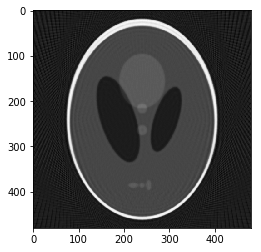

In [171]:
x2 = np.zeros((480,480), dtype='float64')
ATA2 =  iradon(radon(np.ones((480,480)),theta=theta2,circle=False),theta=theta2,circle=False)
i=0
flag=True
while(flag):
    print(i)
    x2+=0.2*iradon((sinogram2 - radon(x2,theta=theta2,circle=False)),theta=theta2,circle=False)/ATA2
    mse=np.sqrt(np.mean((x2-img)**2))
    print(mse)
    if mse<9:
        print('mse limit reached')
        flag=False
    if i>20:
        print('i limit reached')
        flag=False
    i+=1
plt.imshow(x2,cmap='gray')

In [172]:
error1 = fbp2 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error1**2)))

FBP rms reconstruction error: 12.1


In [173]:
error1 = x2 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error1**2)))

FBP rms reconstruction error: 9.28


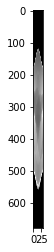

In [189]:
theta3 = np.linspace(0., 180., 30, endpoint=False)
sinogram3 = radon(img, theta=theta3, circle=False)
plt.imshow(sinogram3, cmap='gray')

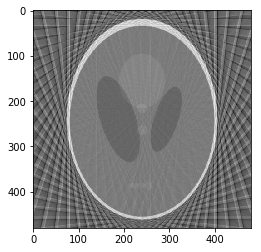

In [190]:
fbp3 = iradon(sinogram3, theta=theta3, circle=False)
plt.imshow(fbp3, cmap = 'gray')

In [191]:
error3 = fbp3 - img
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error3**2)))

FBP rms reconstruction error: 40


0
1e+100
1
61.5038462309
2
60.2945752908
3
59.1271156215
4
57.9986138011
5
56.9066728714
6
55.84923532
7
54.8245074965
8
53.830906746
9
52.8670224969
10
51.9315866363
11
51.0234504177
12
50.1415661372
13
49.2849723824
14
48.452782016
15
47.6441722847
16
46.8583766022
17
46.0946776685
18
45.352401664
19
44.630913319
20
43.9296117003
21
43.2479265914
22
42.5853153648
23
41.9412602695
24
41.3152660655
25
40.7068579554
26
40.1155797661
27
39.5409923482
28
38.9826721599
29
38.4402100122
30
37.913209954
31
37.4012882783
32
36.9040726362
33
36.4212012436
34
35.9523221719
35
35.4970927113
36
35.0551788
37
34.6262545114
38
34.2100015931
39
33.806109053
40
33.4142727877
41
33.0341952475
42
32.6655851375
43
32.3081571476
44
31.9616317122
45
31.6257347938
46
31.3001976908
47
30.984756865
48
30.679153789
49
30.3831348097
50
30.0964510274
51
29.8188581895
52
29.5501165954
53
29.2899910136
54
29.0382506077
55
28.7946688721
56
28.5590235748
57
28.3310967071
58
28.1106744388
59
27.8975470792
60
27.6915

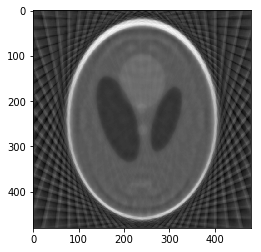

In [206]:
x3 = np.zeros((480,480), dtype='float64')
ATA3 =  iradon(radon(np.ones((480,480)),theta=theta3,circle=False),theta=theta3,circle=False)
i=0
flag=True
error = 1e100
while(flag):
    print(i)
    print(error)
    temp = x3
    temp+=0.02*iradon((sinogram3 - radon(temp,theta=theta3,circle=False)),theta=theta3,circle=False)/ATA3
    mse=np.sqrt(np.mean((temp-img)**2))
    if(mse-error>-0.05):
        flag = False
    else:
        x3 = temp
        error = mse
    i+=1
plt.imshow(x3,cmap='gray')

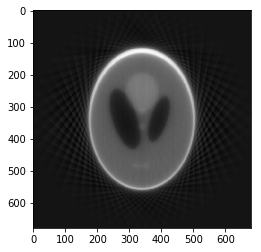

In [204]:
reconstruction_sart = iradon_sart(sinogram3, theta=theta3)
plt.imshow(reconstruction_sart, cmap='gray')